In [6]:
from fit_model import *

In [2]:
from time import time

In [3]:
def define_model_1(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    model.add(GRU(n_units,input_shape=(src_timesteps,1)))
    # ES NECESARIO, para que asi pueda devolver la dimesión de 8
    model.add(RepeatVector(tar_timesteps))
    model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
    return model
    
def define_model_1_var(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    model.add(GRU(n_units,input_shape=(src_timesteps,1)))
    model.add(RepeatVector(tar_timesteps)) 
    model.add(TimeDistributed(Dense(n_units, activation='relu')))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
    return model

# Encoder-Decoder
def define_model_4(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    # Encoder
    model.add(GRU(n_units, input_shape=(src_timesteps,1), go_backwards=True ))
    model.add(RepeatVector(tar_timesteps))
    # Decoder
    model.add(GRU(n_units))
    model.add(RepeatVector(tar_timesteps))
    model.add(TimeDistributed(Dense(n_units, activation='relu')))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
    return model

In [2]:
folderImg_name = "img_caro/cm_model_"
folderModels_name = "models_caro/cm_model_"
folderHistories_name = "histories_caro/cm_history_"

ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', \
                                       'dataset/english-spanish-train-10000.txt', \
                                       'dataset/english-spanish-test-10000.txt'
epochs= 35

# Pruebas Modelo 1

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 512)               791040    
                                                                 
 repeat_vector (RepeatVector  (None, 8, 512)           0         
 )                                                               
                                                                 
 time_distributed (TimeDistr  (None, 8, 4510)          2313630   
 ibuted)                                                         
                                                                 
Total params: 3,104,670
Trainable params: 3,104,670
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/35

Epoch 1: val_loss improved from inf to 3.06660, saving model to models_caro\cm_model_1_4.h5
125/125 - 29s -

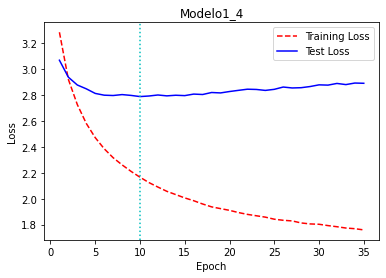

In [5]:
units = 512
learning_rate = 0.005
loss_func='sparse_categorical_crossentropy'
batch_size= 64
id_variation = '1_4'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)

graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 1024)              3154944   
                                                                 
 repeat_vector_1 (RepeatVect  (None, 8, 1024)          0         
 or)                                                             
                                                                 
 time_distributed_1 (TimeDis  (None, 8, 4510)          4622750   
 tributed)                                                       
                                                                 
Total params: 7,777,694
Trainable params: 7,777,694
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/35

Epoch 1: val_loss improved from inf to 2.96477, saving model to models_caro\cm_model_1_5.h5
125/125 - 53s

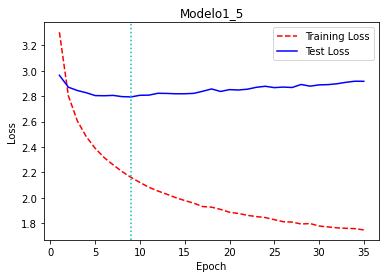

In [6]:
units = 1024
learning_rate = 0.005
loss_func='sparse_categorical_crossentropy'
batch_size= 64
id_variation = '1_5'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)

graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

In [7]:
ini = time()
print( ini)

1651215715.6082177


2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 2048)              12601344  
                                                                 
 repeat_vector_2 (RepeatVect  (None, 8, 2048)          0         
 or)                                                             
                                                                 
 time_distributed_2 (TimeDis  (None, 8, 4510)          9240990   
 tributed)                                                       
                                                                 
Total params: 21,842,334
Trainable params: 21,842,334
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/35

Epoch 1: val_loss improved from inf to 2.97706, saving model to models_caro\cm_model_1_6.h5
125/125 - 1

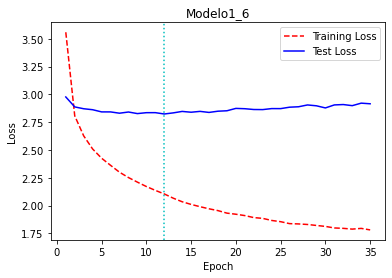

In [8]:
units = 2048
learning_rate = 0.005
loss_func='sparse_categorical_crossentropy'
batch_size= 64
id_variation = '1_6'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

initime = time()
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)
print( f"time elapsed: {time()-initime}")
graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

In [8]:
def extract_histories(quantity, vector_namesHistory):
    for i in range(1,quantity+1):
        history = load_history(vector_namesHistory[i-1])
        history_models_trainLoss.append(history['loss'])
        history_models_testLoss.append(history['val_loss'])

def graph_historyModels(history,title, nameModels, save_image_filename):
    # define axis X , Create count of the number of epochs
    epoch_count = range(1,epochs +1)
        
    plt.plot(epoch_count, history[0], 'r-')
    plt.plot(epoch_count, history[1], 'b-')
    plt.plot(epoch_count, history[2], 'g-')
    plt.legend(nameModels)
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    # Visualize loss history
    plt.savefig(save_image_filename) 
    plt.show() 

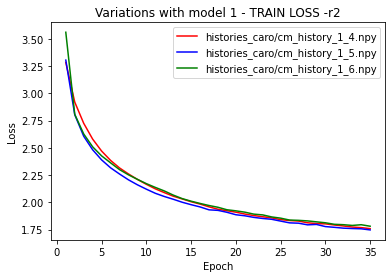

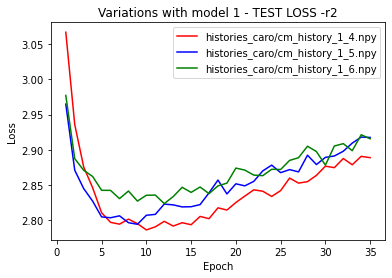

In [9]:
history_models_trainLoss = list()
history_models_testLoss = list()

def extract_histories(quantity, vector_namesHistory):
    for i in range(1,quantity+1):
        history = load_history(vector_namesHistory[i-1])
        history_models_trainLoss.append(history['loss'])
        history_models_testLoss.append(history['val_loss'])
    
def graph_historyModels(history,title, nameModels, save_image_filename):
    # define axis X , Create count of the number of epochs
    epoch_count = range(1,epochs +1)
        
    plt.plot(epoch_count, history[0], 'r-')
    plt.plot(epoch_count, history[1], 'b-')
    plt.plot(epoch_count, history[2], 'g-')
    plt.legend(nameModels)
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    # Visualize loss history
    plt.savefig(save_image_filename) 
    plt.show() 

flder = folderHistories_name
vector_namesHistory = [flder+'1_4.npy',flder+'1_5.npy',flder+'1_6.npy']
vector_names_legends = ['Model_1_4', 'Model_1_5','Model_1_6']

extract_histories(3, vector_namesHistory)

graph_historyModels(history_models_trainLoss,"Variations with model 1 - TRAIN LOSS -r2", \
                             vector_namesHistory,  \
                             folderImg_name+"1_variations_trainLoss_r2")

graph_historyModels(history_models_testLoss,"Variations with model 1 - TEST LOSS -r2",  \
                             vector_namesHistory,  \
                             folderImg_name+"1_variations_testLoss_r2")

# Pruebas Modelo 1 var

In [10]:
history_models_trainLoss = list()
history_models_testLoss = list()

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 256)               198912    
                                                                 
 repeat_vector_3 (RepeatVect  (None, 8, 256)           0         
 or)                                                             
                                                                 
 time_distributed_3 (TimeDis  (None, 8, 256)           65792     
 tributed)                                                       
                                                                 
 dropout (Dropout)           (None, 8, 256)            0         
                                                                 
 time_distributed_4 (TimeDis  (None, 8, 4510)          1159070   
 tributed)                                                       


250/250 - 20s - loss: 2.3601 - acc: 0.6407 - val_loss: 2.8401 - val_acc: 0.6417 - 20s/epoch - 82ms/step
time elapsed: 736.9523365497589


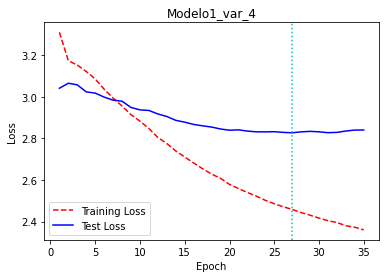

In [11]:
units = 256
learning_rate = 0.003
loss_func='sparse_categorical_crossentropy'
batch_size= 32
id_variation = '1_var_4'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_1_var(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

initime = time()
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)
print( f"time elapsed: {time()-initime}")
graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 256)               198912    
                                                                 
 repeat_vector_4 (RepeatVect  (None, 8, 256)           0         
 or)                                                             
                                                                 
 time_distributed_5 (TimeDis  (None, 8, 256)           65792     
 tributed)                                                       
                                                                 
 dropout_1 (Dropout)         (None, 8, 256)            0         
                                                                 
 time_distributed_6 (TimeDis  (None, 8, 4510)          1159070   
 tributed)                                                       


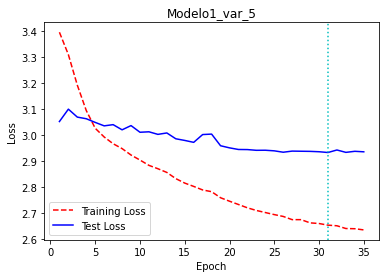

In [12]:
units = 256
learning_rate = 0.01
loss_func='sparse_categorical_crossentropy'
batch_size= 32
id_variation = '1_var_5'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_1_var(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

initime = time()
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)
print( f"time elapsed: {time()-initime}")
graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_5 (GRU)                 (None, 256)               198912    
                                                                 
 repeat_vector_5 (RepeatVect  (None, 8, 256)           0         
 or)                                                             
                                                                 
 time_distributed_7 (TimeDis  (None, 8, 256)           65792     
 tributed)                                                       
                                                                 
 dropout_2 (Dropout)         (None, 8, 256)            0         
                                                                 
 time_distributed_8 (TimeDis  (None, 8, 4510)          1159070   
 tributed)                                                       


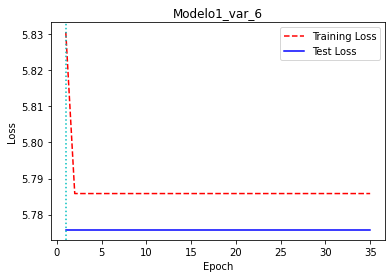

In [13]:
units = 256
learning_rate = 0.1
loss_func='sparse_categorical_crossentropy'
batch_size= 32
id_variation = '1_var_6'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_1_var(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

initime = time()
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)
print( f"time elapsed: {time()-initime}")
graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

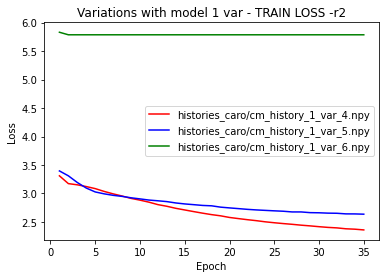

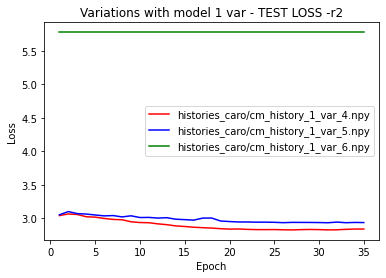

In [14]:
history_models_trainLoss = list()
history_models_testLoss = list()

flder = folderHistories_name

vector_namesHistory = [flder+'1_var_4.npy',flder+'1_var_5.npy',flder+'1_var_6.npy']
vector_names_legends = ['Model_1_var_4', 'Model_1_var_5','Model_1_var_6']

extract_histories(3, vector_namesHistory)

graph_historyModels(history_models_trainLoss,"Variations with model 1 var - TRAIN LOSS -r2", \
                             vector_namesHistory,  \
                             folderImg_name+"1_var_variations_trainLoss_r2")

graph_historyModels(history_models_testLoss,"Variations with model 1 var - TEST LOSS -r2",  \
                             vector_namesHistory,  \
                             folderImg_name+"1_var_variations_testLoss_r2")

# Pruebas de Modelo 4

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 128)               50304     
                                                                 
 repeat_vector_6 (RepeatVect  (None, 8, 128)           0         
 or)                                                             
                                                                 
 gru_7 (GRU)                 (None, 128)               99072     
                                                                 
 repeat_vector_7 (RepeatVect  (None, 8, 128)           0         
 or)                                                             
                                                                 
 time_distributed_9 (TimeDis  (None, 8, 128)           16512     
 tributed)                                                       


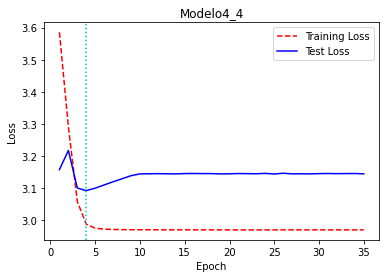

In [15]:
units = 128
learning_rate = 0.01
loss_func='sparse_categorical_crossentropy'
batch_size= 16
id_variation = '4_4'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_4(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

initime = time()
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)
print( f"time elapsed: {time()-initime}")
graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 128)               50304     
                                                                 
 repeat_vector_8 (RepeatVect  (None, 8, 128)           0         
 or)                                                             
                                                                 
 gru_9 (GRU)                 (None, 128)               99072     
                                                                 
 repeat_vector_9 (RepeatVect  (None, 8, 128)           0         
 or)                                                             
                                                                 
 time_distributed_11 (TimeDi  (None, 8, 128)           16512     
 stributed)                                                      


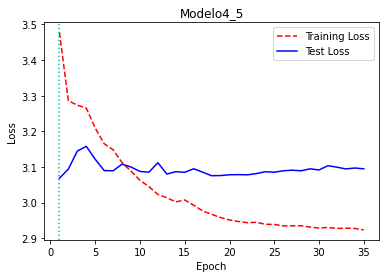

In [16]:
units = 128
learning_rate = 0.01
loss_func='sparse_categorical_crossentropy'
batch_size= 64
id_variation = '4_5'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_4(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

initime = time()
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)
print( f"time elapsed: {time()-initime}")
graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_10 (GRU)                (None, 128)               50304     
                                                                 
 repeat_vector_10 (RepeatVec  (None, 8, 128)           0         
 tor)                                                            
                                                                 
 gru_11 (GRU)                (None, 128)               99072     
                                                                 
 repeat_vector_11 (RepeatVec  (None, 8, 128)           0         
 tor)                                                            
                                                                 
 time_distributed_13 (TimeDi  (None, 8, 128)           16512     
 stributed)                                                      


time elapsed: 565.9921426773071


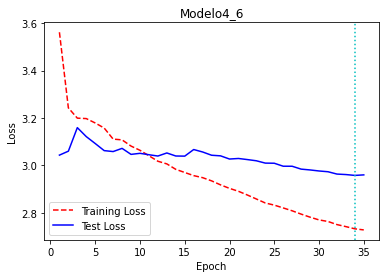

In [17]:
units = 128
learning_rate = 0.01
loss_func='sparse_categorical_crossentropy'
batch_size= 128
id_variation = '4_6'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_4(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

initime = time()
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)
print( f"time elapsed: {time()-initime}")
graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

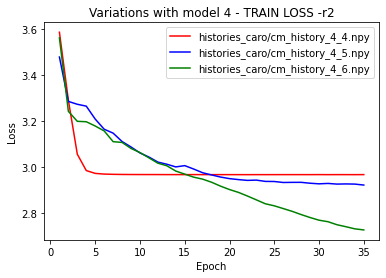

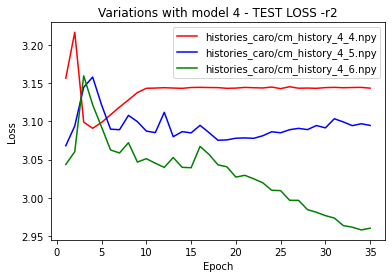

Model_4_4 = 3.0908925533294678
Model_4_5 = 3.0681066513061523
Model_4_6 = 2.9581472873687744


In [11]:
history_models_trainLoss = list()
history_models_testLoss = list()

flder = folderHistories_name

vector_namesHistory = [flder+'4_4.npy',flder+'4_5.npy',flder+'4_6.npy']
vector_names_legends = ['Model_4_4', 'Model_4_5','Model_4_6']

extract_histories(3, vector_namesHistory)

graph_historyModels(history_models_trainLoss,"Variations with model 4 - TRAIN LOSS -r2", \
                             vector_namesHistory,  \
                             folderImg_name+"4_variations_trainLoss_r2")

graph_historyModels(history_models_testLoss,"Variations with model 4 - TEST LOSS -r2",  \
                             vector_namesHistory,  \
                             folderImg_name+"4_variations_testLoss_r2")

# prini min val_loss
print(f"{vector_names_legends[0]} = {min(history_models_testLoss[0]) }" )
print(f"{vector_names_legends[1]} = {min(history_models_testLoss[1])}" )
print(f"{vector_names_legends[2]} = {min(history_models_testLoss[2])}" )